
#### Teoría de Circuitos II

#  TPL1
#### Autor: Grupo 2 ?

Federico Rodriguez Vizzon

Facundo ...

Tamara ....

<img src="./ned.jpg" align="left" width="150" /> 

# Funcion transferencia   

$T(s) = \frac{s^2 + \omega_0}{s^2 + s \frac{\omega_0}{Q} + \omega_0^2}$

$Q = \frac{\omega_0}{B \sqrt{q^2 -1}}$

$B =\left(\omega_2 - \omega_1\right) $

$q = 10^{\frac{\alpha_{max}}{20}} $

Si $\alpha_{max} = 3db \implies q = \sqrt(2) \implies Q = \frac{\omega_0}{\omega_2 - \omega_1} = \frac{f_0}{f_2 - f_1}$

$f_0 = \sqrt{f_1f_2}$

## Especificaciones de diseño:

$f_0 = 50Hz$

$B = 10Hz$

$\alpha_{max} = 3dB$

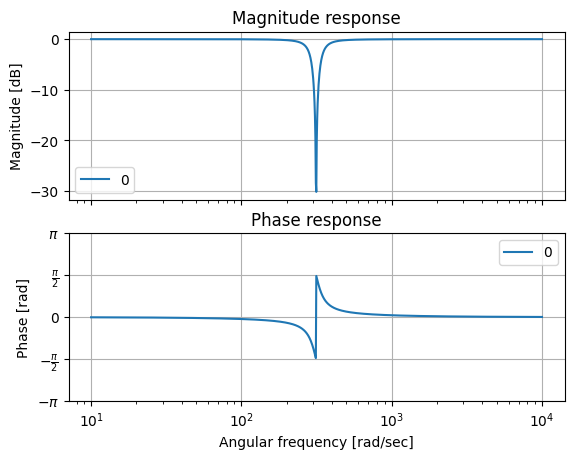

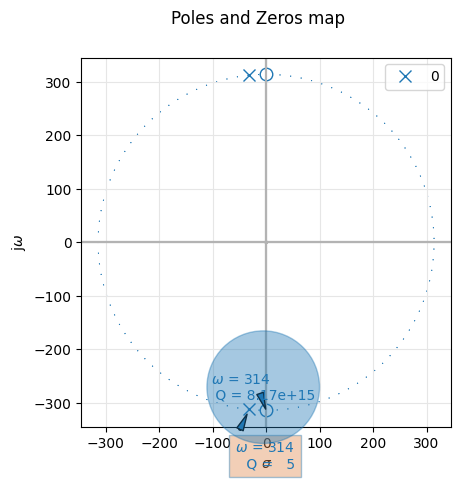

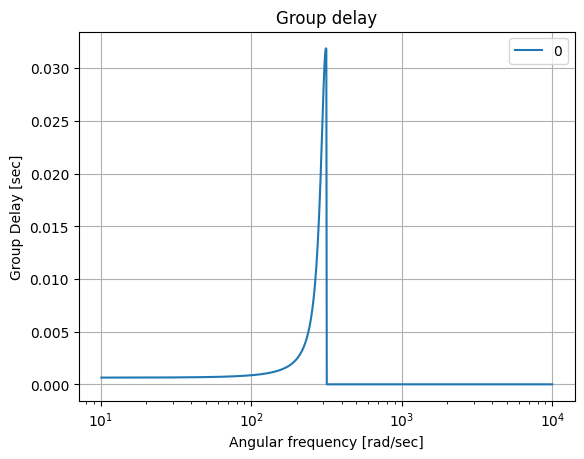

In [5]:
import numpy as np
from scipy import signal as signal
from pytc2.sistemas_lineales import bodePlot, pzmap, GroupDelay, analyze_sys, tf2sos_analog, pretty_print_SOS
from pytc2.general import Chebyshev_polynomials
from pytc2.sistemas_lineales import TransferFunction as tf
f_o = 50
b = 10
w_o = 2*np.pi*f_o
q = f_o/10

num_notch = [1, 0, (w_o**2)]
den_notch = [1, (w_o/q), (w_o**2)]
tf(num_notch, den_notch)
analyze_sys(tf(num_notch, den_notch))

## Sintesis del circuito

Partiendo del siguiente circuito obtenido de la nota de aplicacion 746-7592 procedemos a calcular los valores de los componentes para sintetizar un filtro notch con $f_o = 50Hz$ 

<img src="./notch_circuit.png" align="center" width = "800"/> 

### Ecuaciones de diseño

$f_0 = \frac{1}{R_FC2\pi} \implies R_F = \frac{1}{2\pi f_0 C}$

$R_{F1} = R_{F2} = R_F \land C = C_1 = C_2 = 1000pF$

$B = \frac{f_0}{Q}$

$R_Q = \frac{25K}{Q -1}$

$Q = \frac{R_{Z3}}{R_{Z1}} = \frac{R_{Z3}}{R_{Z1}} \implies R_{Z2} = R_{Z1}$

De lo calculado anteriormente sabemos que $Q = 5$ $B = 10$ y $f_0 = 50$

Adoptamos $R_{Z3} = 10K\Omega \implies R_{Z1}=R_{Z2} = \frac{R_{Z3}}{Q} = \frac{10K\Omega}{5} = 2K\Omega$ 

$R_Q = \frac{25K\Omega}{Q - 1} = \frac{25K\Omega}{4} = 6250\Omega$

$R_F = \frac{1}{2\pi f_0 C} = 3.1830M\Omega$

(60.0, 5999.99999999998)

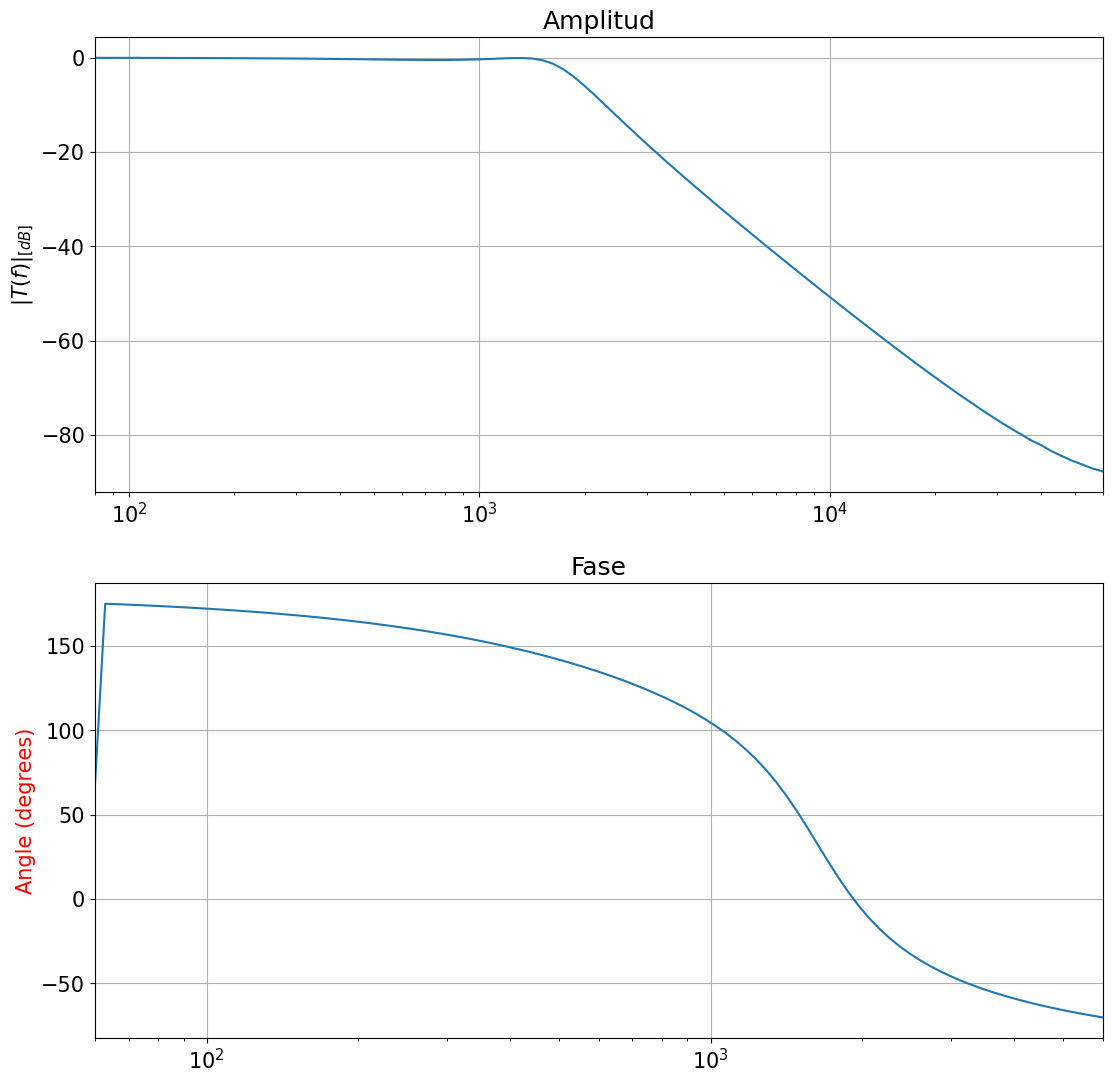

In [6]:
from numpy import genfromtxt
import matplotlib.pyplot as plot
import matplotlib

#levantamos los valores de modulo (previeamente descartamos el header y otro relleno del csv.)
module_csv = genfromtxt('modulo_demo.csv', delimiter = ',')
y_0_axis_amplitude = module_csv[:, 1] 
x_0_axis_frequency = module_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_0_upper_limit = max(x_0_axis_frequency)
x_0_lower_limit = min(x_0_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje y
y_0_upper_limit = max(y_0_axis_amplitude)*1.1
y_0_lower_limit = min(y_0_axis_amplitude)*0.9

#levantamos la curvar de fase:
fase_csv = genfromtxt('fase.csv', delimiter = ',')
y_1_axis_phase = fase_csv[:, 1] 
x_1_axis_frequency = fase_csv[:, 0]

##Valores maximos y minimos que tenemos que representar en el eje x
x_1_upper_limit = max(x_1_axis_frequency)
x_1_lower_limit = min(x_1_axis_frequency)

##Valores maximos y minimos que tenemos que representar en el eje x
y_1_upper_limit = max(y_1_axis_phase)*1.1
y_1_lower_limit = min(y_1_axis_phase)*0.9

##Configuramos el graph
matplotlib.rcParams['figure.figsize'] = (13,13)
matplotlib.rcParams['font.size'] = 15
#configuramos la cantidad de graficos, 2 filas 1 columna
figure, axes = plot.subplots(2,1)

axes[0].plot(x_0_axis_frequency, y_0_axis_amplitude)
axes[0].set_ylabel(r'$|T(f)|_{[dB]}$')
axes[0].set_xscale('log')
axes[0].grid()
axes[0].set_title("Amplitud")
#limitamos el grafico a los valores de frecuencia disponibles.
axes[0].set_xlim([x_0_lower_limit, x_0_upper_limit])
#no limitamos en y, la libreria lo esta resolviendo mejor que nosotros.
#axes[0].set_ylim([y_0_lower_limit, y_0_upper_limit])

axes[1].plot(x_1_axis_frequency, y_1_axis_phase)
axes[1].set_ylabel("Angle (degrees)", color='red')
axes[1].set_xscale('log')
axes[1].grid()
axes[1].set_title("Fase")
axes[1].set_xlim([x_1_lower_limit, x_1_upper_limit])


